In [74]:
import osmnx
import networkx
import pickle

network_types = ["bike", "walk", "drive"]

In [21]:
for type in network_types:
    graph = osmnx.graph_from_place("Philadelphia, Pennsylvania, USA", network_type=type)

    with open(f"datta/graphs/city_graph_{type}.pkl", "wb") as file:
        pickle.dump(graph, file)

In [5]:
for type in network_types:
    with open(f"data/graphs/city_graph_{type}.pkl", "rb") as file:
        graph = pickle.load(file)

    osmnx.plot_graph(graph, node_size=0, edge_linewidth=0.1, save=True, filepath=f"data/graphs/city_graph_{type}.png")


NameError: name 'network_types' is not defined

In [73]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("data/cartodb-query.csv")

coordinates = df[["point_x", "point_y"]].values.tolist()

# Initialize an empty list to store valid coordinates
valid_coordinates = []

# Loop through each row using iterrows()
for index, row in df.iterrows():
    point_y = row["point_y"]
    point_x = row["point_x"]

    # Check if values are not NaN
    if pd.notna(point_y) and pd.notna(point_x):
        valid_coordinates.append((point_y, point_x))  # Append as a tuple

# Print the collected valid coordinates
print("Valid coordinates collected:", valid_coordinates[0:100])


# columns = df.columns.tolist()

# Print the columns
# print(coordinates)


# Display the first few rows
# print(df.head())


Valid coordinates collected: [(39.93624675, -75.23212511), (40.02897422, -75.08318828), (39.95388172, -75.17264175), (39.92920082, -75.14352594), (39.93799162, -75.16762896), (40.03006942, -75.05602341), (39.93941627, -75.1573691), (39.93860812, -75.16751883), (39.9294464, -75.14829537), (39.92686812, -75.14568824), (40.03186207, -75.10631911), (39.95675137, -75.20794146), (39.92217441, -75.14237468), (40.07425783, -75.20273278), (39.969779, -75.175406), (40.02149961, -75.13345593), (40.05254891, -75.00530916), (39.94514881, -75.17224503), (40.05555537, -75.04919712), (40.0248, -75.214504), (40.03940218, -75.03285621), (40.03307537, -75.08454832), (39.91857003, -75.18530186), (40.03767623, -75.0392667), (40.01223821, -75.06693892), (39.97425413, -75.13951476), (39.883489, -75.23237), (39.883489, -75.23237), (40.02714539, -75.13863518), (39.97400838, -75.16191943), (40.016611, -75.147184), (39.92254728, -75.18515149), (39.93681755, -75.15935683), (39.99539085, -75.1868302), (39.95196792

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("data/crime_data.csv")

# Extract unique items from the 'text_general_code' column and store them in a set
unique_codes = df["text_general_code"].dropna().unique()
codes_dict = {code: 0 for code in unique_codes}


# Print the set of unique codes
print("Unique items in text_general_code:", codes_dict)


In [85]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import pandas as pd

# Read the CSV file
df = pd.read_csv("data/crime_data.csv")

coordinates = df[["point_x", "point_y"]].values.tolist()

# Initialize an empty list to store valid coordinates
valid_coordinates = []

# Loop through each row using iterrows()
for index, row in df.iterrows():
    point_y = row["point_y"]
    point_x = row["point_x"]
    dispatch_date_time = row["dispatch_date_time"]

    # Check if values are not NaN
    if pd.notna(point_y) and pd.notna(point_x) and pd.notna(dispatch_date_time):
        if not (
            dispatch_date_time.split("-")[0] == "2024"
            and dispatch_date_time.split("-")[1] == "09"
        ):
            continue
        print(dispatch_date_time)
        valid_coordinates.append((point_y, point_x))  # Append as a tuple

# Step 1: Get geographic data
# You can download points of interest (POIs) from OpenStreetMap using osmnx or any source
# Let's take POIs in Philadelphia for example
gdf = osmnx.geometries_from_place("Philadelphia, Pennsylvania, USA", tags={'amenity':True})

# Extract the coordinates of the POIs
gdf_points = gdf[gdf.geometry.type == 'Point']
# coordinates = [(point.y, point.x) for point in gdf_points.geometry]

# Step 2: Create a map
m = folium.Map(location=[39.9, -75.0], zoom_start=8)

# Step 3: Add the heatmap layer
HeatMap(valid_coordinates, radius=15, blur=10, max_val=1).add_to(m)

# Step 4: Save the map as an HTML file
m.save("density_map.html")

# This will create an interactive density map


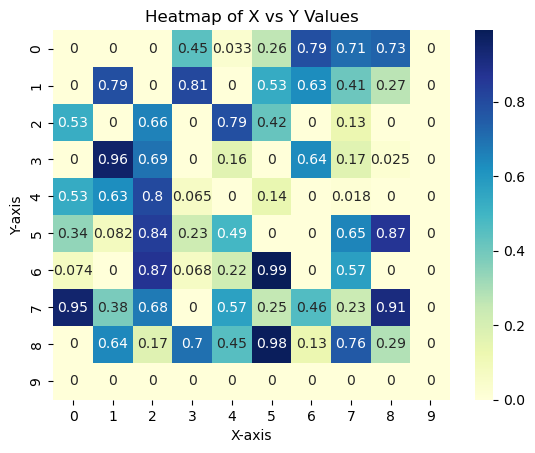

In [79]:
def getShortestPath()